In [2]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
#create variable for data file
clean_data = "Clean_Resources/Master_NC_Dataframe_2020.csv"

#read in data file
clean_data= pd.read_csv(clean_data)

#display data
clean_data.head()

,County,year,Active Dentists,Active Primary Care Physicians,Beds in General Hospitals,Deaths by Injury or Violence,Divorces,General Hospital Discharges,Infant Deaths,Low-Weight Births Under 2500 Grams,...,Medicare Enrollees Age 65+ with Medical Coverage,Social Security Beneficiaries,Social Security Disabled Worker Beneficiaries,Social Security Retired Worker Beneficiaries,Substantiated Reports of Child Abuse,Substantiated Reports of Child Abuse and Neglect,Substantiated Reports of Child Neglect,Unduplicated Count of Medicaid Eligibles,Work First Recipients,death_per_1000_infant_death
0,Alamance County,2020,70.0,96.0,182.0,185.0,539.0,12498.0,11.0,183.0,...,28887,52720,6596,41603,14,17,48,42763,228,0.064172
1,Alexander County,2020,5.0,8.0,25.0,38.0,52.0,0.0,1.0,28.0,...,7187,13375,1854,10355,1,1,3,8682,73,0.027439
2,Alleghany County,2020,2.0,7.0,41.0,15.0,40.0,154.0,0.0,8.0,...,2905,4770,570,3830,0,2,0,3046,33,0.000000
3,Anson County,2020,3.0,7.0,15.0,31.0,66.0,406.0,5.0,43.0,...,4358,7889,1420,5674,0,2,9,8695,89,0.226706
4,Ashe County,2020,8.0,15.0,76.0,23.0,78.0,1057.0,2.0,20.0,...,6970,11191,1305,8928,0,6,13,6603,35,0.075253


In [88]:
# create dataframe with interested initial data 
small_data= pd.DataFrame({
    'County': clean_data['County'],
    'Percent of Persons in Poverty': clean_data['Percent of Persons in Poverty'],
    'Population Density (Persons per Square Mile)': clean_data['Population Density (Persons per Square Mile)'],
    'Resident Live Births': clean_data['Resident Live Births'],
    'Mean Family Income': clean_data['Mean Family Income'],
    'death_per_1000_infant_death': clean_data['death_per_1000_infant_death'],
    'Infant Deaths': clean_data['Infant Deaths'],
    'Pregnancies for Females of All Ages': clean_data['Pregnancies for Females of All Ages'],
    'Pregnancies for Females 15-19': clean_data['Pregnancies for Females 15-19'],
    'Population (Census/Estimate/Projection)': clean_data['Population (Census/Estimate/Projection)'], 
    'Population Density (Persons per Square Mile)': clean_data['Population Density (Persons per Square Mile)'],
})

small_data.head()

,County,Percent of Persons in Poverty,Population Density (Persons per Square Mile),Resident Live Births,Mean Family Income,death_per_1000_infant_death,Infant Deaths,Pregnancies for Females of All Ages,Pregnancies for Females 15-19,Population (Census/Estimate/Projection)
0,Alamance County,15.42,394.75,1831.0,83335.0,0.064172,11.0,2270.0,133.0,171415.0
1,Alexander County,12.30,138.24,346.0,81515.0,0.027439,1.0,377.0,23.0,36444.0
2,Alleghany County,22.61,46.08,96.0,69940.0,0.000000,0.0,106.0,7.0,10888.0
3,Anson County,18.77,41.06,278.0,64011.0,0.226706,5.0,348.0,33.0,22055.0
4,Ashe County,14.83,61.90,233.0,64186.0,0.075253,2.0,242.0,29.0,26577.0


In [5]:
#Sorting the data by infant death per 1000
infant_death_per_1000 = pd.DataFrame(clean_data, columns=['County', 'death_per_1000_infant_death'])
infant_death_per_1000 = infant_death_per_1000.sort_values(by=['death_per_1000_infant_death'], ascending=False)
#print(infant_death_per_1000.head(150))
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#print(infant_death_per_1000)
infant_death_per_1000.head()

,County,death_per_1000_infant_death
3,Anson County,0.226706
92,Warren County,0.214569
76,Richmond County,0.209566
45,Hertford County,0.185598
30,Duplin County,0.184748


In [54]:
#Sorting the data by infant death per 1000
infant_death_per_1000 = pd.DataFrame(clean_data, columns=['County', 'death_per_1000_infant_death', 'Population (Census/Estimate/Projection)', 'Population Density (Persons per Square Mile)'])
infant_death_per_1000 = infant_death_per_1000.sort_values(by=['death_per_1000_infant_death'], ascending=True)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#print(infant_death_per_1000)
infant_death_per_1000.head(-1)

,County,death_per_1000_infant_death,Population (Census/Estimate/Projection),Population Density (Persons per Square Mile)
37,Graham County,0.000000,8030.0,26.62
74,Polk County,0.000000,19328.0,81.06
14,Camden County,0.000000,10355.0,33.38
20,Chowan County,0.000000,13708.0,58.67
21,Clay County,0.000000,11089.0,50.23
58,McDowell County,0.000000,44578.0,100.10
26,Currituck County,0.000000,28100.0,53.38
16,Caswell County,0.000000,22736.0,53.03
27,Dare County,0.000000,36915.0,23.94
88,Tyrrell County,0.000000,3245.0,5.43


In [61]:
#mean, median, mode of population
mean_population = np.mean(infant_death_per_1000['Population (Census/Estimate/Projection)'])
print(f"The mean county population in NC is {mean_population}")

median_population = np.median(infant_death_per_1000['Population (Census/Estimate/Projection)'])
print(f"The median county population in NC is {median_population}")

The mean county population in NC is 104393.88
The median county population in NC is 51352.5


In [63]:
#mean, median, mode of population density
mean_population = np.mean(infant_death_per_1000['Population Density (Persons per Square Mile)'])
print(f"The mean county population per square mile in NC is {mean_population}")

median_population = np.median(infant_death_per_1000['Population Density (Persons per Square Mile)'])
print(f"The median county population per square mile in NC is {median_population}")

The mean county population per square mile in NC is 200.20620000000002
The median county population per square mile in NC is 108.905


In [49]:
#Bin infant_deaths_per_1000
#Define bin labels
bin_df = infant_death_per_1000[['County', 'death_per_1000_infant_death']]
bin_labels = ['0', '.02', '.04', '.06', '.08', '.10', '.12', '.14', '.16', '.18', '.20', '.22']
#Create bins
bins= [-1, .02, .04, .06, .08, .10, .12, .14, .16, .18, .20, .22, .24]
#Create new column infant_deaths_per_1000_bin
bin_df['death_per_1000_infant_death'] = pd.cut(bin_df['death_per_1000_infant_death'], bins=bins, labels=bin_labels)
#Check new column
#bin_df.head()
bin_df.groupby('death_per_1000_infant_death').count()

C:\Users\lorig\AppData\Local\Temp\ipykernel_27832\2624419586.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_df['death_per_1000_infant_death'] = pd.cut(bin_df['death_per_1000_infant_death'], bins=bins, labels=bin_labels)


,County
death_per_1000_infant_death,
0,17
.02,6
.04,21
.06,16
.08,9
.10,8
.12,9
.14,4
.16,3


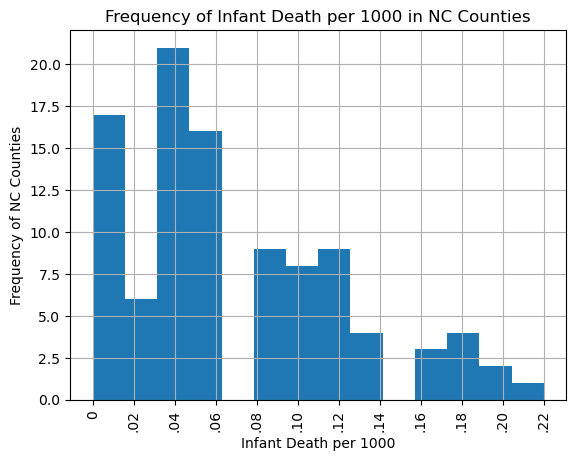

In [90]:
#infant_death_per_1000 histogram with 13 bins
bin_df["death_per_1000_infant_death"].hist(bins=14)
plt.xticks(rotation=90)
plt.xlabel("Infant Death per 1000")
plt.ylabel("Frequency of NC Counties")
plt.title("Frequency of Infant Death per 1000 in NC Counties")
plt.show()

In [48]:
# find percent of infant deaths in each NC county (infant deaths/ live births)) 
pct_infant_deaths = pd.DataFrame(small_data)
pct_infant_deaths= pct_infant_deaths["Infant Deaths"]/ pct_infant_deaths["Resident Live Births"]
pct_infant_deaths = pd.DataFrame({'County': small_data['County'], '% Infant Deaths': pct_infant_deaths})
pct_infant_deaths['% Infant Deaths'] = pct_infant_deaths['% Infant Deaths'].map(lambda x: x*100)
pct_infant_deaths = pct_infant_deaths.sort_values(by=['% Infant Deaths'], ascending=False)
#Sorting the data by infant death per total of live births and infant deaths
#pct_infant_deaths = pct_infant_deaths.sort_values(by=['death_per_1000_infant_death'], ascending=False)

#pct_infant_deaths.head()
print(pct_infant_deaths)

                 County  % Infant Deaths
92        Warren County         2.247191
45      Hertford County         1.923077
3          Anson County         1.798561
57        Martin County         1.746725
65   Northampton County         1.724138
7         Bertie County         1.685393
82      Scotland County         1.643836
73          Pitt County         1.548452
29         Davie County         1.546392
76      Richmond County         1.500000
6       Beaufort County         1.401869
98        Yadkin County         1.381215
84        Stokes County         1.305483
30        Duplin County         1.287554
18       Chatham County         1.240310
32     Edgecombe County         1.180438
8         Bladen County         1.162791
35        Gaston County         1.138594
68       Pamlico County         1.123596
97        Wilson County         1.113586
61    Montgomery County         1.111111
69    Pasquotank County         1.089325
71    Perquimans County         1.086957
63          Nash

In [70]:
# make a new df with info but ignore the zeros
top_bottom_5 = small_data[clean_data['death_per_1000_infant_death'] !=0]
# sort the df by the death_per_1000_infant_death column
top_bottom_5 = top_bottom_5.sort_values(by=['death_per_1000_infant_death'], ascending=False)
#print
print(top_bottom_5)

                 County  Percent of Persons in Poverty  \
3          Anson County                          18.77   
92        Warren County                          20.90   
76      Richmond County                          22.40   
45      Hertford County                          20.47   
30        Duplin County                          18.18   
73          Pitt County                          20.80   
57        Martin County                          20.44   
82      Scotland County                          27.25   
65   Northampton County                          20.09   
7         Bertie County                          24.99   
46          Hoke County                          18.59   
25    Cumberland County                          18.75   
32     Edgecombe County                          22.28   
29         Davie County                          13.72   
8         Bladen County                          24.34   
6       Beaufort County                          17.79   
98        Yadk

In [72]:
# create top 5 df (.head(5) to the end of the sorted df)
top_5 = top_bottom_5.head(5)
print(top_5)


             County  Percent of Persons in Poverty  \
3      Anson County                          18.77   
92    Warren County                          20.90   
76  Richmond County                          22.40   
45  Hertford County                          20.47   
30    Duplin County                          18.18   

    Population Density (Persons per Square Mile)  Resident Live Births  \
3                                          41.06                 278.0   
92                                         41.96                 178.0   
76                                         89.53                 600.0   
45                                         59.80                 208.0   
30                                         59.39                 699.0   

    Mean Family Income  death_per_1000_infant_death  Infant Deaths  \
3              64011.0                     0.226706            5.0   
92             68638.0                     0.214569            4.0   
76             62812

In [74]:
# create bottom 5 df (.tail(5) to the end of the sorted df)
bottom_5 = top_bottom_5.tail(5)
print(bottom_5)

              County  Percent of Persons in Poverty  \
96     Wilkes County                          16.42   
85      Surry County                          16.43   
1   Alexander County                          12.30   
72     Person County                          16.26   
9   Brunswick County                          11.10   

    Population Density (Persons per Square Mile)  Resident Live Births  \
96                                         87.22                 682.0   
85                                        132.97                 756.0   
1                                         138.24                 346.0   
72                                         96.68                 426.0   
9                                         130.24                1000.0   

    Mean Family Income  death_per_1000_infant_death  Infant Deaths  \
96             70035.0                     0.030317            2.0   
85             76731.0                     0.028027            2.0   
1             

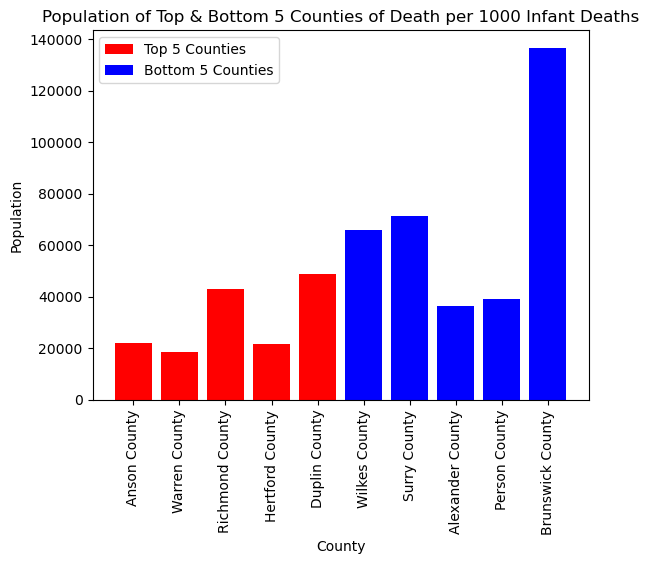

In [77]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for population
plt.bar(top_5['County'], top_5['Population (Census/Estimate/Projection)'], color='red')
plt.bar(bottom_5['County'], bottom_5['Population (Census/Estimate/Projection)'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Population of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

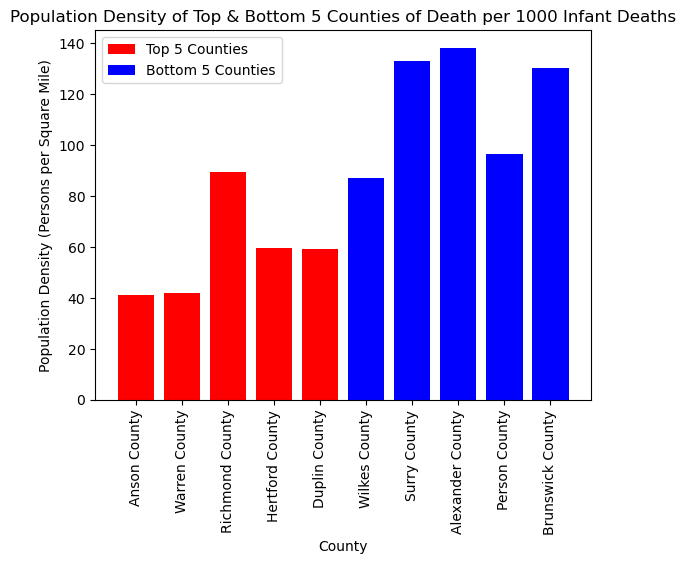

In [78]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for population density
plt.bar(top_5['County'], top_5['Population Density (Persons per Square Mile)'], color='red')
plt.bar(bottom_5['County'], bottom_5['Population Density (Persons per Square Mile)'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Population Density (Persons per Square Mile)')
plt.title('Population Density of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

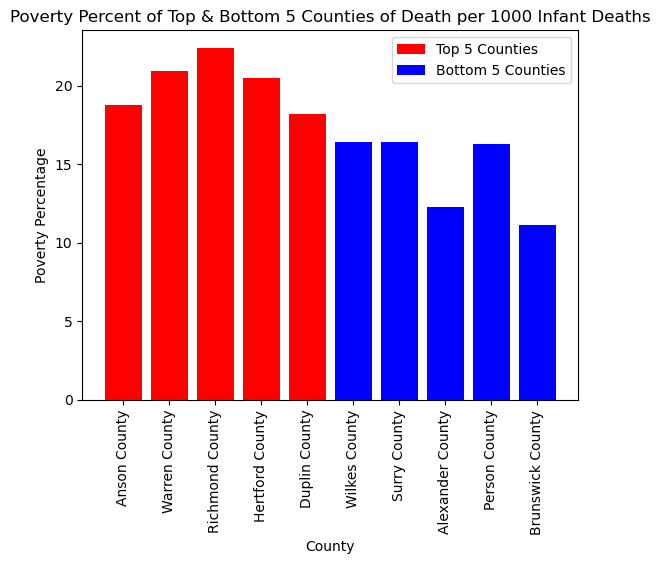

In [83]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for Percent of Persons in Poverty
plt.bar(top_5['County'], top_5['Percent of Persons in Poverty'], color='red')
plt.bar(bottom_5['County'], bottom_5['Percent of Persons in Poverty'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Poverty Percentage')
plt.title('Poverty Percent of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

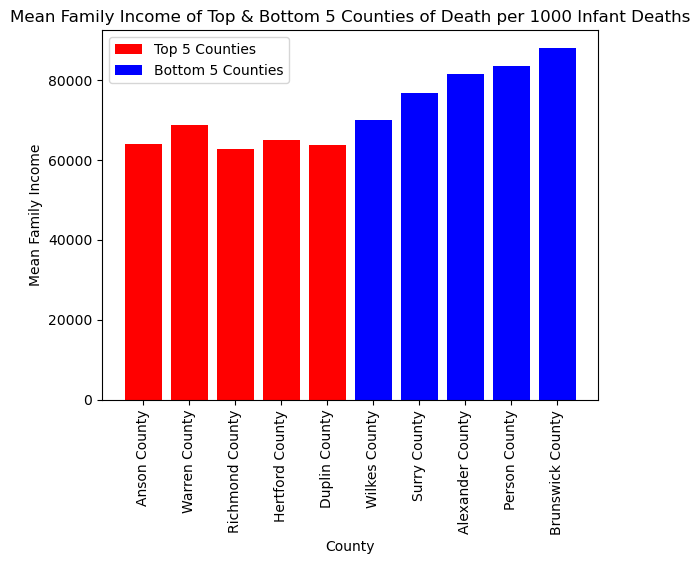

In [82]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for mean family income
plt.bar(top_5['County'], top_5['Mean Family Income'], color='red')
plt.bar(bottom_5['County'], bottom_5['Mean Family Income'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Mean Family Income')
plt.title('Mean Family Income of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

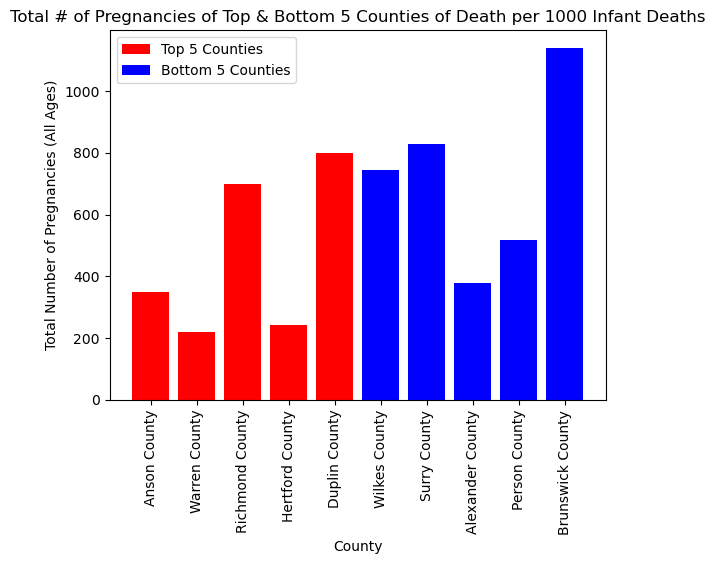

In [91]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for pregnancies for females of all ages
plt.bar(top_5['County'], top_5['Pregnancies for Females of All Ages'], color='red')
plt.bar(bottom_5['County'], bottom_5['Pregnancies for Females of All Ages'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Total Number of Pregnancies (All Ages)')
plt.title('Total # of Pregnancies of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

In [89]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for pregnancies for females 15-19 years old
plt.bar(top_5['County'], top_5['Pregnancies for Females 15-19'], color='red')
plt.bar(bottom_5['County'], bottom_5['Pregnancies for Females 15-19'], color='blue')
plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Pregancies for Females Age 15-19')
plt.title('Age 15-19 Pregnancies of Top & Bottom 5 Counties of Death per 1000 Infant Deaths')
plt.legend(['Top 5 Counties', 'Bottom 5 Counties'])
plt.show()

KeyError: 'Pregnancies for Females 15-19'

In [ ]:
#plt.bar of top & bottom 5 counties of death__per_1000_infant_death for .............

In [ ]:
# summary stats (groupby aggregations)

#plt.bar 2 bar charts in one cell (both will be in output)

In [11]:
# display bar graph of the median family income for each NC county

In [12]:
# display bar graph of the % of familys in poverty for each NC county


In [13]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the % of ......

In [14]:
# create a scatter plot with correlation and regression of ....

In [15]:
# generate a box plot that shows the distribution of .....
